In [2]:
#! pip install mlxtend


In [3]:
#! pip install lightgbm

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

#models
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

#İSTATİKSEL
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

In [5]:
#data_con=pd.read_excel("concrete.xls")
data_slump=pd.read_csv("slump_test.data")

In [6]:
#data_con.head()

In [7]:
#data_con.info()

In [8]:

df_slump=data_slump.copy()

In [9]:
df_slump.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [10]:
df_slump.columns

Index(['No', 'Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

# İstatiksel analiz

#### veri setimizde target kolonu olarak Compressive Strength (28-day)(Mpa) kaldı

In [11]:
from sklearn.model_selection import train_test_split
X_3 = df_slump.drop(['FLOW(cm)','Compressive Strength (28-day)(Mpa)'],1) 
y_3 = df_slump[['SLUMP(cm)']]


In [12]:
#Değişkenlerin tanımlaması
#y, X = patsy.dmatrices('"Compressive Strength (28-day)(Mpa)" ~ Cement + Slag + "Fly ash" + Water + SP + "Coarse Aggr."+ "Fine Aggr."', data=df_slump, return_type="dataframe")

# Modeli Oluşturma
model = sm.OLS(y_3, X_3)

# Modeli Eğitme
fit = model.fit()

# Oluşturduğumuz modele ilişkin istatistiksel değerleri görüntüleme
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SLUMP(cm)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.699e+29
Date:                Fri, 14 Apr 2023   Prob (F-statistic):                        0.00
Time:                        12:56:33   Log-Likelihood:                          2914.3
No. Observations:                 103   AIC:                                     -5811.
Df Residuals:                      94   BIC:                                     -5787.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
No              1.7e-16   5.23e-16      0.325      0.746   -8.69e-16    1.21e-15
Cement        2.602e-17   2.11e-16      0.123      0.902   -3.92e-16    4.44e-16
Slag          3.339e-17   2.82e-16      0.119      0.906   -5.26e-16    5.93e-16
Fly ash      -2.949e-17   2.09e-16     -0.141      0.888   -4.45e-16    3.86e-16
Water        -1.561e-17    6.7e-16     -0.023      0.981   -1.35e-15    1.32e-15
SP           -1.388e-15   5.19e-15     -0.267      0.790   -1.17e-14    8.92e-15
Coarse Aggr.   4.51e-17   1.08e-16      0.418      0.677   -1.69e-16    2.59e-16
Fine Aggr.     1.11e-16    1.7e-16      0.654      0.515   -2.26e-16    4.48e-16
SLUMP(cm)        1.0000   1.82e-15    5.5e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        8.908   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.691
Skew:                           0.629   Prob(JB):                       0.0130
Kurtosis:                       3.666   Cond. No.                         487.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# PYCARET

In [13]:
# !pip install pycaret

In [14]:
#from pycaret.regression import *

In [15]:
df_slump_3 = df_slump.drop(['FLOW(cm)','Compressive Strength (28-day)(Mpa)'],1) 

### Train Test Split

In [16]:
df_slump_3_train,df_slump_3_test=train_test_split(df_slump_3,random_state=42,test_size=0.2)

In [17]:
df_slump_3_test.isnull().sum()

No              0
Cement          0
Slag            0
Fly ash         0
Water           0
SP              0
Coarse Aggr.    0
Fine Aggr.      0
SLUMP(cm)       0
dtype: int64

In [18]:
df_slump_3_train.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
53,54,309.0,0.0,142.0,218.0,10.0,912.0,680.0,24.0
22,23,148.0,180.0,0.0,183.0,11.0,972.0,757.0,0.0
68,69,320.0,127.0,164.0,211.0,6.0,721.0,723.0,2.0
44,45,298.0,107.0,0.0,186.0,6.0,879.0,815.0,3.0
98,99,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0


In [19]:
df_slump_3_test.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm)
30,31,321.0,0.0,164.0,190.0,5.0,870.0,774.0,24.0
67,68,166.0,0.0,260.0,183.0,13.0,859.0,827.0,21.0
62,63,299.0,107.0,0.0,210.0,10.0,881.0,745.0,25.0
47,48,287.0,94.0,121.0,188.0,9.0,904.0,696.0,25.0
42,43,160.0,146.0,188.0,203.0,11.0,829.0,710.0,13.0


In [20]:
# Split features and labels
train_labels_3 = df_slump_3_train['SLUMP(cm)'].reset_index(drop=True)
train_features_3 = df_slump_3_train.drop(['SLUMP(cm)'], axis=1)
test_y_3=df_slump_3_test["SLUMP(cm)"]
test_features_3=df_slump_3_test.drop(["SLUMP(cm)"],inplace=True,axis=1)
test_features_3 = df_slump_3_test.copy()

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features_3, test_features_3]).reset_index(drop=True)
all_features.shape

(103, 8)

### MODELS 

In [21]:
X_train = all_features.iloc[:len(train_labels_3), :]
X_test = all_features.iloc[len(train_labels_3):, :]
X_train.shape, train_labels_3.shape, X_test.shape

((82, 8), (82,), (21, 8))

In [22]:
# Setup cross validation folds
kf = KFold(n_splits=12, random_state=42, shuffle=True)

In [23]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)

# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=ridge_alphas, cv=kf))

# Support Vector Regressor
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003))

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                       random_state=42)

dt=DecisionTreeRegressor(random_state=42)
mlp=MLPRegressor(random_state=1, max_iter=300)

# Stack up all the models above, optimized using xgboost
klstack_gen = StackingCVRegressor(regressors=(xgboost, lightgbm, svr, ridge, gbr, rf),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

In [24]:
def mse(y, y_pred):
    return mean_squared_error(y, y_pred)
def r2(y, y_pred):
    return r2_score(y, y_pred)
def mae(y, y_pred):
    return mean_absolute_error(y, y_pred)

def mape(y, y_pred):
    return ean_absolute_percentage_error(y, y_pred)


# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

"""
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)
"""

'\ndef cv_rmse(model, X=X):\n    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))\n    return (rmse)\n'

In [25]:
models_list=["xgboost", "lightgbm", "svr", "ridge", "gbr", "rf","dt","mlp"]
models=[xgboost, lightgbm, svr, ridge, gbr, rf,dt,mlp]
mse_result_3=[]
r2_result_3=[]
mae_result_3=[]
mape_result_3=[]
rmsle_result_3=[]
for model in models:
    model=model.fit(train_features_3,train_labels_3)
#---------------------------------------------------------------------------
    y_pred_3=model.predict(test_features_3)
#--------------------------------------------------------------------------
    mse_sonuc_3=mean_squared_error(test_y_3, y_pred_3)
    r2_sonuc_3=r2(test_y_3, y_pred_3)
    mae_sonuc_3=mean_absolute_error(test_y_3, y_pred_3)
    mape_sonuc_3=mean_absolute_percentage_error(test_y_3, y_pred_3)
    rmsle_sonuc_3=rmsle(test_y_3, y_pred_3)
#--------------------------------------------------------------------------------
    mse_result_3.append(mse_sonuc_3)
    r2_result_3.append(r2_sonuc_3)
    mae_result_3.append(mae_sonuc_3)
    mape_result_3.append(mape_sonuc_3)
    rmsle_result_3.append(rmsle_sonuc_3)
    
    

[12:56:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


In [26]:
models_result_df_3=pd.DataFrame({"models":models_list,"mse_result":mse_result_3,"mae_result":mae_result_3,\
"mape_result":mape_result_3,"rmsle_result":rmsle_result_3,"r2_result":r2_result_3 })
                                

In [27]:
models_result_df_3=models_result_df_3.sort_values(by=["r2_result"],ascending=False).reset_index(drop=True)

In [28]:
models_result_df_3


,models,mse_result,mae_result,mape_result,rmsle_result,r2_result
0,rf,36.090944,4.666670,2.228120e+15,6.007574,0.313843
1,ridge,48.468279,5.875330,3.475334e+15,6.961916,0.078526
2,xgboost,52.648505,4.862288,2.768169e+15,7.255929,-0.000948
3,lightgbm,54.877565,5.696587,1.185891e+15,7.407939,-0.043327
4,svr,55.337614,5.094593,4.569703e+15,7.438926,-0.052073
5,gbr,60.173524,5.294880,2.099370e+15,7.757160,-0.144013
6,dt,93.398810,6.571429,5.039742e+15,9.664306,-0.775689
7,mlp,3407.264895,53.398628,1.503408e+16,58.371782,-63.778575


In [29]:
models_result_df_3_g=models_result_df_3.iloc[:6,:]

In [30]:
models_result_df_3_g

,models,mse_result,mae_result,mape_result,rmsle_result,r2_result
0,rf,36.090944,4.666670,2.228120e+15,6.007574,0.313843
1,ridge,48.468279,5.875330,3.475334e+15,6.961916,0.078526
2,xgboost,52.648505,4.862288,2.768169e+15,7.255929,-0.000948
3,lightgbm,54.877565,5.696587,1.185891e+15,7.407939,-0.043327
4,svr,55.337614,5.094593,4.569703e+15,7.438926,-0.052073
5,gbr,60.173524,5.294880,2.099370e+15,7.757160,-0.144013


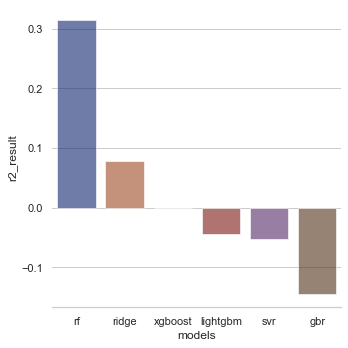

In [31]:
import seaborn as sns
sns.set_theme(style="whitegrid")



# Draw a nested barplot by species and sex
g = sns.catplot(
    data=models_result_df_3_g, kind="bar",
    x="models", y="r2_result",
     palette="dark", alpha=.6, height=5
)
g.despine(left=True)
g.set_axis_labels("models", "r2_result")